In [1]:
import sys  
sys.path.insert(1, './../../ESN-IP/IP/.')


In [15]:
from DATA import MG17

data = MG17(True, [80,10,10])

X_TR, Y_TR = data.TR()
X_VAL, Y_VAL = data.VAL()
X_TS, Y_TS = data.TS()

In [26]:
from ESN import Reservoir
reservoir = Reservoir(N = 30, sparsity=0.9, ro_rescale=0.25, bias = True)

In [27]:
reservoir.LCE(X_TR)


-1.4269139

In [28]:
from IntrinsicPlasticity import IPMask

In [31]:
from IPReservoir import IPReservoir
ip_reservoir = IPReservoir(N = 30, sparsity=0.9, ro_rescale=0.25, bias = True, mask=IPMask.normalMask(30))

In [35]:
ip_reservoir.pre_train(X_TR, epochs=10)

No transient applied. Reservoir was already warmed up
- Epoch: 1) | KL Divergence value: 1694.5596923828125.
- Epoch: 2) | KL Divergence value: 1670.296875.
- Epoch: 3) | KL Divergence value: 1653.6912841796875.
- Epoch: 4) | KL Divergence value: 1643.344970703125.
- Epoch: 5) | KL Divergence value: 1637.909423828125.
- Epoch: 6) | KL Divergence value: 1636.2080078125.
- Epoch: 7) | KL Divergence value: 1637.2930908203125.
- Epoch: 8) | KL Divergence value: 1640.4368896484375.
- Epoch: 9) | KL Divergence value: 1645.1005859375.
- Epoch: 10) | KL Divergence value: 1650.894775390625.


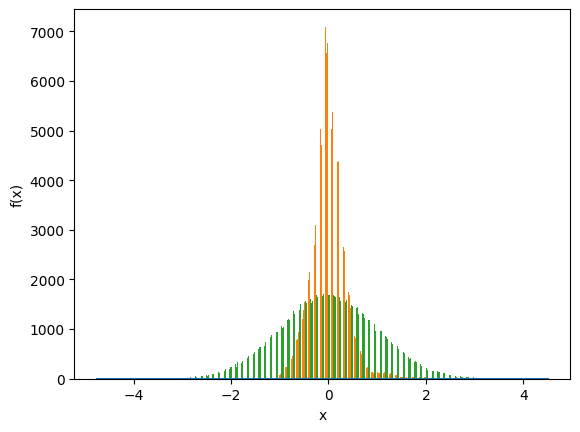

In [36]:
ip_reservoir.predict(X_TR, save_gradients=False, save_states=True)
ip_reservoir.plot_global_neural_activity()

In [38]:
ip_reservoir.LCE(X_VAL)

c:\Users\casa_\OneDrive\Desktop\workspace\ESN-IP\NOTEBOOKS\./../../ESN-IP/IP/.\ESN.py:119: RuntimeWarning: divide by zero encountered in log
  eig_acc += np.log(np.absolute(eig_k))


-0.4335083

In [39]:
ip_reservoir.LCE(X_TS)

c:\Users\casa_\OneDrive\Desktop\workspace\ESN-IP\NOTEBOOKS\./../../ESN-IP/IP/.\ESN.py:119: RuntimeWarning: divide by zero encountered in log
  eig_acc += np.log(np.absolute(eig_k))


-0.43350324